In [26]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import ast
from IPython.display import display, Image
from PIL import Image

In [27]:
df=pd.read_csv("../Common/Final Cleaned/battle_log_cleaned.csv")
df.head(2)

,type,gameMode,crowns1,startingTrophies2,crowns2,deck1,deck2,max_level_1,level_1,max_level_2,level_2,avg_cards_level_1,avg_cards_level_2,avg_cards_level_diff,1_won,2_won
0,PvP,"{'id': 72000201, 'name': 'Ladder_CrownRush'}",0,5807.0,3,"['Arrows', 'Bomber', 'Electro Wizard', 'Skelet...","['Magic Archer', 'Mega Knight', 'Electro Wizar...","[14, 14, 6, 9, 14, 12, 12, 6]","[11, 12, 2, 5, 14, 12, 10, 3]","[6, 6, 6, 9, 6, 9, 14, 12]","[4, 6, 4, 8, 3, 9, 13, 12]",11.75,12.875,1.125,False,True
1,PvP,"{'id': 72000201, 'name': 'Ladder_CrownRush'}",0,5857.0,2,"['Arrows', 'Bomber', 'Electro Wizard', 'Skelet...","['Mini P.E.K.K.A', 'Wall Breakers', 'Valkyrie'...","[14, 14, 6, 9, 14, 12, 12, 6]","[11, 12, 2, 5, 14, 12, 10, 3]","[12, 9, 12, 9, 12, 9, 14, 6]","[12, 7, 10, 8, 10, 9, 12, 4]",11.75,12.625,0.875,False,True


# Most Common Deck

The 1 most common deck is ['Cannon', 'Fireball', 'Hog Rider', 'Ice Golem', 'Ice Spirit', 'Musketeer', 'Skeletons', 'The Log'] with a count of 67.


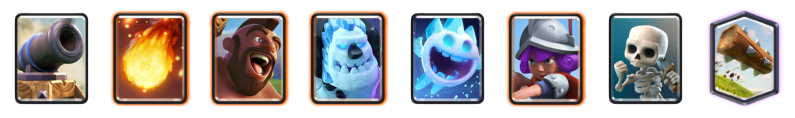

The 2 most common deck is ['Goblin Barrel', 'Goblin Gang', 'Ice Spirit', 'Inferno Tower', 'Princess', 'Rocket', 'The Log', 'Valkyrie'] with a count of 54.


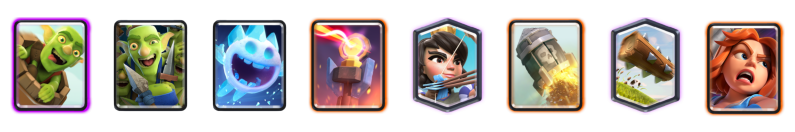

The 3 most common deck is ['Arrows', 'Baby Dragon', 'Balloon', 'Inferno Dragon', 'Lava Hound', 'Mega Minion', 'Miner', 'Skeleton Army'] with a count of 34.


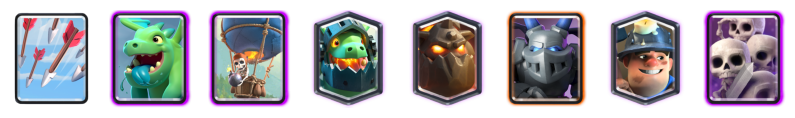

In [28]:
df['deck1'] = df['deck1'].apply(ast.literal_eval)
df['deck2'] = df['deck2'].apply(ast.literal_eval)

sort_and_replace_none = lambda x: sorted([str(e) if isinstance(e, str) else str(e) for e in x])

card_counts = pd.Series(df['deck1'].dropna().apply(sort_and_replace_none)).value_counts()

# Print the top 3 most frequent lists and their counts
top_decks = card_counts.index[:3]
for i, deck in enumerate(top_decks):
    deck_count = card_counts[i]
    print(f"The {i+1} most common deck is {deck} with a count of {deck_count}.")
    
    fig, axs = plt.subplots(1, len(deck), figsize=(10, 4))
    for j, card in enumerate(deck):
        image = f"../Common/Cards Images/{card}.png"
        axs[j].imshow(plt.imread(image))
        axs[j].axis('off')
        
    plt.show()

# Most Common Deck That Won

The 1 most common deck is ['Cannon', 'Fireball', 'Hog Rider', 'Ice Golem', 'Ice Spirit', 'Musketeer', 'Skeletons', 'The Log'] with a count of 58.


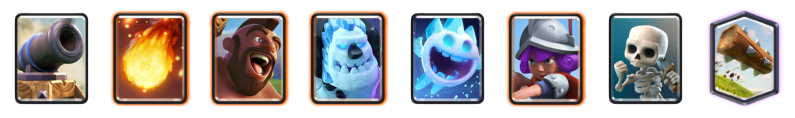

The 2 most common deck is ['Goblin Barrel', 'Goblin Gang', 'Ice Spirit', 'Inferno Tower', 'Knight', 'Princess', 'Rocket', 'The Log'] with a count of 35.


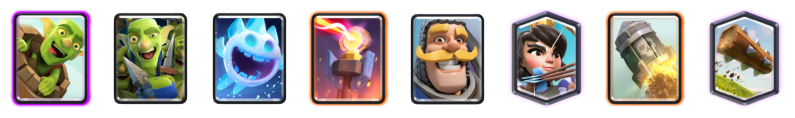

The 3 most common deck is ['Archers', 'Fireball', 'Ice Spirit', 'Knight', 'Skeletons', 'Tesla', 'The Log', 'X-Bow'] with a count of 19.


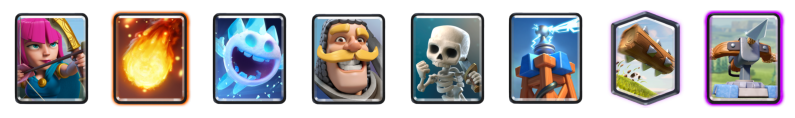

In [29]:
# Sort the dataframe by outcome
df_sorted = df.sort_values('1_won', ascending=False)

# Separate the dataframe into winning and losing dataframes
df_win = df_sorted[:4241]
df_lost = df_sorted[4241:]

# Define a lambda function to sort and replace None values
sort_and_replace_none = lambda x: sorted([str(e) if isinstance(e, str) else str(e) for e in x])

# Get the value counts for the player decks in the winning dataframe
card_counts = pd.Series(df_lost['deck2'].dropna().apply(sort_and_replace_none)).value_counts()

# Get the top 3 most common decks and their counts
top_decks = card_counts.index[:3]
for i, deck in enumerate(top_decks):
    deck_count = card_counts[i]
    print(f"The {i+1} most common deck is {deck} with a count of {deck_count}.")
    
    # Create a subplot for each card in the deck
    fig, axs = plt.subplots(1, len(deck), figsize=(10, 4))
    for j, card in enumerate(deck):
        image = f"../Common/Cards Images/{card}.png"
        axs[j].imshow(plt.imread(image))
        axs[j].axis('off')
        
    plt.show()


# Looking into Battle Details

<AxesSubplot:ylabel='Density'>

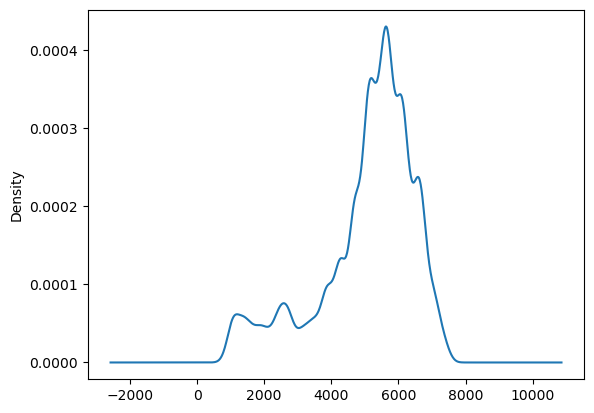

In [30]:
df['startingTrophies2'].plot.kde(bw_method=0.1)

From this, we can see the general distribution of throphy spread of the players in this range, where the highest concentration is around 5000-6000 throphy levels

## What is the current Meta?

In [47]:
card_info=pd.read_csv("../Common/Final Cleaned/cardsInfo.csv")
card_info.drop(['link'], axis=1, inplace=True)
card_info.head(3)

,Unnamed: 0,id,elixir,name,level1,hitpoints1,damage1,level2,hitpoints2,damage2,...,damage11,level12,hitpoints12,damage12,level13,hitpoints13,damage13,level14,hitpoints14,damage14
0,0,Skellies,1,Skeletons,1,32.0,96.0,2,35.0,105.0,...,243.0,12,89.0,267.0,13,98.0,294.0,14,108.0,324.0
1,1,IceSpirit,1,Ice Spirit,1,90.0,43.0,2,99.0,47.0,...,110.0,12,252.0,120.0,13,278.0,132.0,14,305.0,145.0
2,2,Heal,1,Heal,1,0.0,0.0,2,0.0,0.0,...,0.0,12,0.0,0.0,13,0.0,0.0,14,0.0,0.0


In [40]:
#Get the full list of cards first
full_list = []
for row in range(len(df)):
    full_list = full_list + df['deck2'].iloc[row]
full_list = list(set(full_list))

cards_df = pd.DataFrame(index=full_list)

In [41]:
cards_df['Count'] = 0
for card in cards_df.index:
    count = 0
    for i in range(len(df)):
        if card in df['deck2'].iloc[i]:
            count+=1
    cards_df['Count'][card] = count


In [43]:
cards_df['wins'] = 0
win_df = df.loc[df['2_won']==1].reset_index()
for card in cards_df.index:
    count = 0
    for i in range(len(win_df)):
        if card in win_df['deck2'].iloc[i]:
            count+=1
    cards_df['wins'][card] = count

In [44]:
cards_df['win_rate'] = round(cards_df['wins']/cards_df['Count'],2)


In [48]:
pd. set_option('display.max_rows', 200)
cards_df.sort_values(by=['Count'],ascending=False,) #Base win rate: 0.4659

,Count,wins,win_rate
Valkyrie,3960,1856,0.47
Skeleton Army,3368,1588,0.47
The Log,3210,1581,0.49
Wizard,2987,1368,0.46
Mega Knight,2967,1456,0.49
Witch,2925,1377,0.47
Arrows,2728,1217,0.45
Goblin Barrel,2641,1254,0.47
Fireball,2619,1137,0.43
Mini P.E.K.K.A,2406,1122,0.47
